In [31]:
import pandas as pd 
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRBJnebvMnlTNzQGPPEsU8BKIXKcV_T5Wq4h6zPzTpw3dzIbjQWR8tIoqhq16Ys8mzLs_MwPUTY-3ja/pub?gid=633075172&single=true&output=csv") 
df

code_module code_presentation  ...  disability final_result
0             AAA             2013J  ...           N         Pass
1             AAA             2013J  ...           N         Pass
2             AAA             2013J  ...           Y    Withdrawn
3             AAA             2013J  ...           N         Pass
4             AAA             2013J  ...           N         Pass
...           ...               ...  ...         ...          ...
32588         GGG             2014J  ...           N         Fail
32589         GGG             2014J  ...           N  Distinction
32590         GGG             2014J  ...           Y         Pass
32591         GGG             2014J  ...           N    Withdrawn
32592         GGG             2014J  ...           N  Distinction

[32593 rows x 12 columns]

In [53]:
df.describe()

id_student  ...  educationLevel_encoded
count  3.259300e+04  ...            32593.000000
mean   7.066877e+05  ...                1.022888
std    5.491673e+05  ...                0.981401
min    3.733000e+03  ...                0.000000
25%    5.085730e+05  ...                0.000000
50%    5.903100e+05  ...                1.000000
75%    6.444530e+05  ...                2.000000
max    2.716795e+06  ...                4.000000

[8 rows x 6 columns]

In [33]:
from sklearn.preprocessing import LabelEncoder
df["gender_encoded"] = LabelEncoder().fit_transform( df["gender"] )
df

code_module code_presentation  ...  final_result gender_encoded
0             AAA             2013J  ...          Pass              1
1             AAA             2013J  ...          Pass              0
2             AAA             2013J  ...     Withdrawn              0
3             AAA             2013J  ...          Pass              0
4             AAA             2013J  ...          Pass              0
...           ...               ...  ...           ...            ...
32588         GGG             2014J  ...          Fail              0
32589         GGG             2014J  ...   Distinction              0
32590         GGG             2014J  ...          Pass              0
32591         GGG             2014J  ...     Withdrawn              0
32592         GGG             2014J  ...   Distinction              0

[32593 rows x 13 columns]

In [34]:
from sklearn.preprocessing import LabelEncoder
df["result_encoded"] = LabelEncoder().fit_transform( df["final_result"] )
df

code_module code_presentation  ...  gender_encoded result_encoded
0             AAA             2013J  ...               1              2
1             AAA             2013J  ...               0              2
2             AAA             2013J  ...               0              3
3             AAA             2013J  ...               0              2
4             AAA             2013J  ...               0              2
...           ...               ...  ...             ...            ...
32588         GGG             2014J  ...               0              1
32589         GGG             2014J  ...               0              0
32590         GGG             2014J  ...               0              2
32591         GGG             2014J  ...               0              3
32592         GGG             2014J  ...               0              0

[32593 rows x 14 columns]

In [35]:
from sklearn.preprocessing import LabelEncoder
df["educationLevel_encoded"] = LabelEncoder().fit_transform( df["highest_education"] )
df

code_module code_presentation  ...  result_encoded educationLevel_encoded
0             AAA             2013J  ...               2                      1
1             AAA             2013J  ...               2                      1
2             AAA             2013J  ...               3                      0
3             AAA             2013J  ...               2                      0
4             AAA             2013J  ...               2                      2
...           ...               ...  ...             ...                    ...
32588         GGG             2014J  ...               1                      2
32589         GGG             2014J  ...               0                      2
32590         GGG             2014J  ...               2                      0
32591         GGG             2014J  ...               3                      2
32592         GGG             2014J  ...               0                      1

[32593 rows x 15 columns]

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

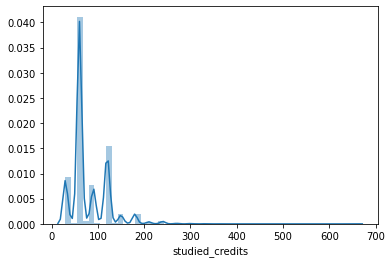

In [37]:
sns.distplot(df["studied_credits"])

In [38]:
df_input = df[["gender_encoded", "educationLevel_encoded", "studied_credits"]]

In [39]:
df_input

gender_encoded  educationLevel_encoded  studied_credits
0                   1                       1              240
1                   0                       1               60
2                   0                       0               60
3                   0                       0               60
4                   0                       2               60
...               ...                     ...              ...
32588               0                       2               30
32589               0                       2               30
32590               0                       0               30
32591               0                       2               30
32592               0                       1               30

[32593 rows x 3 columns]

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=4)

In [41]:
classifier.fit(df_input, df["result_encoded"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

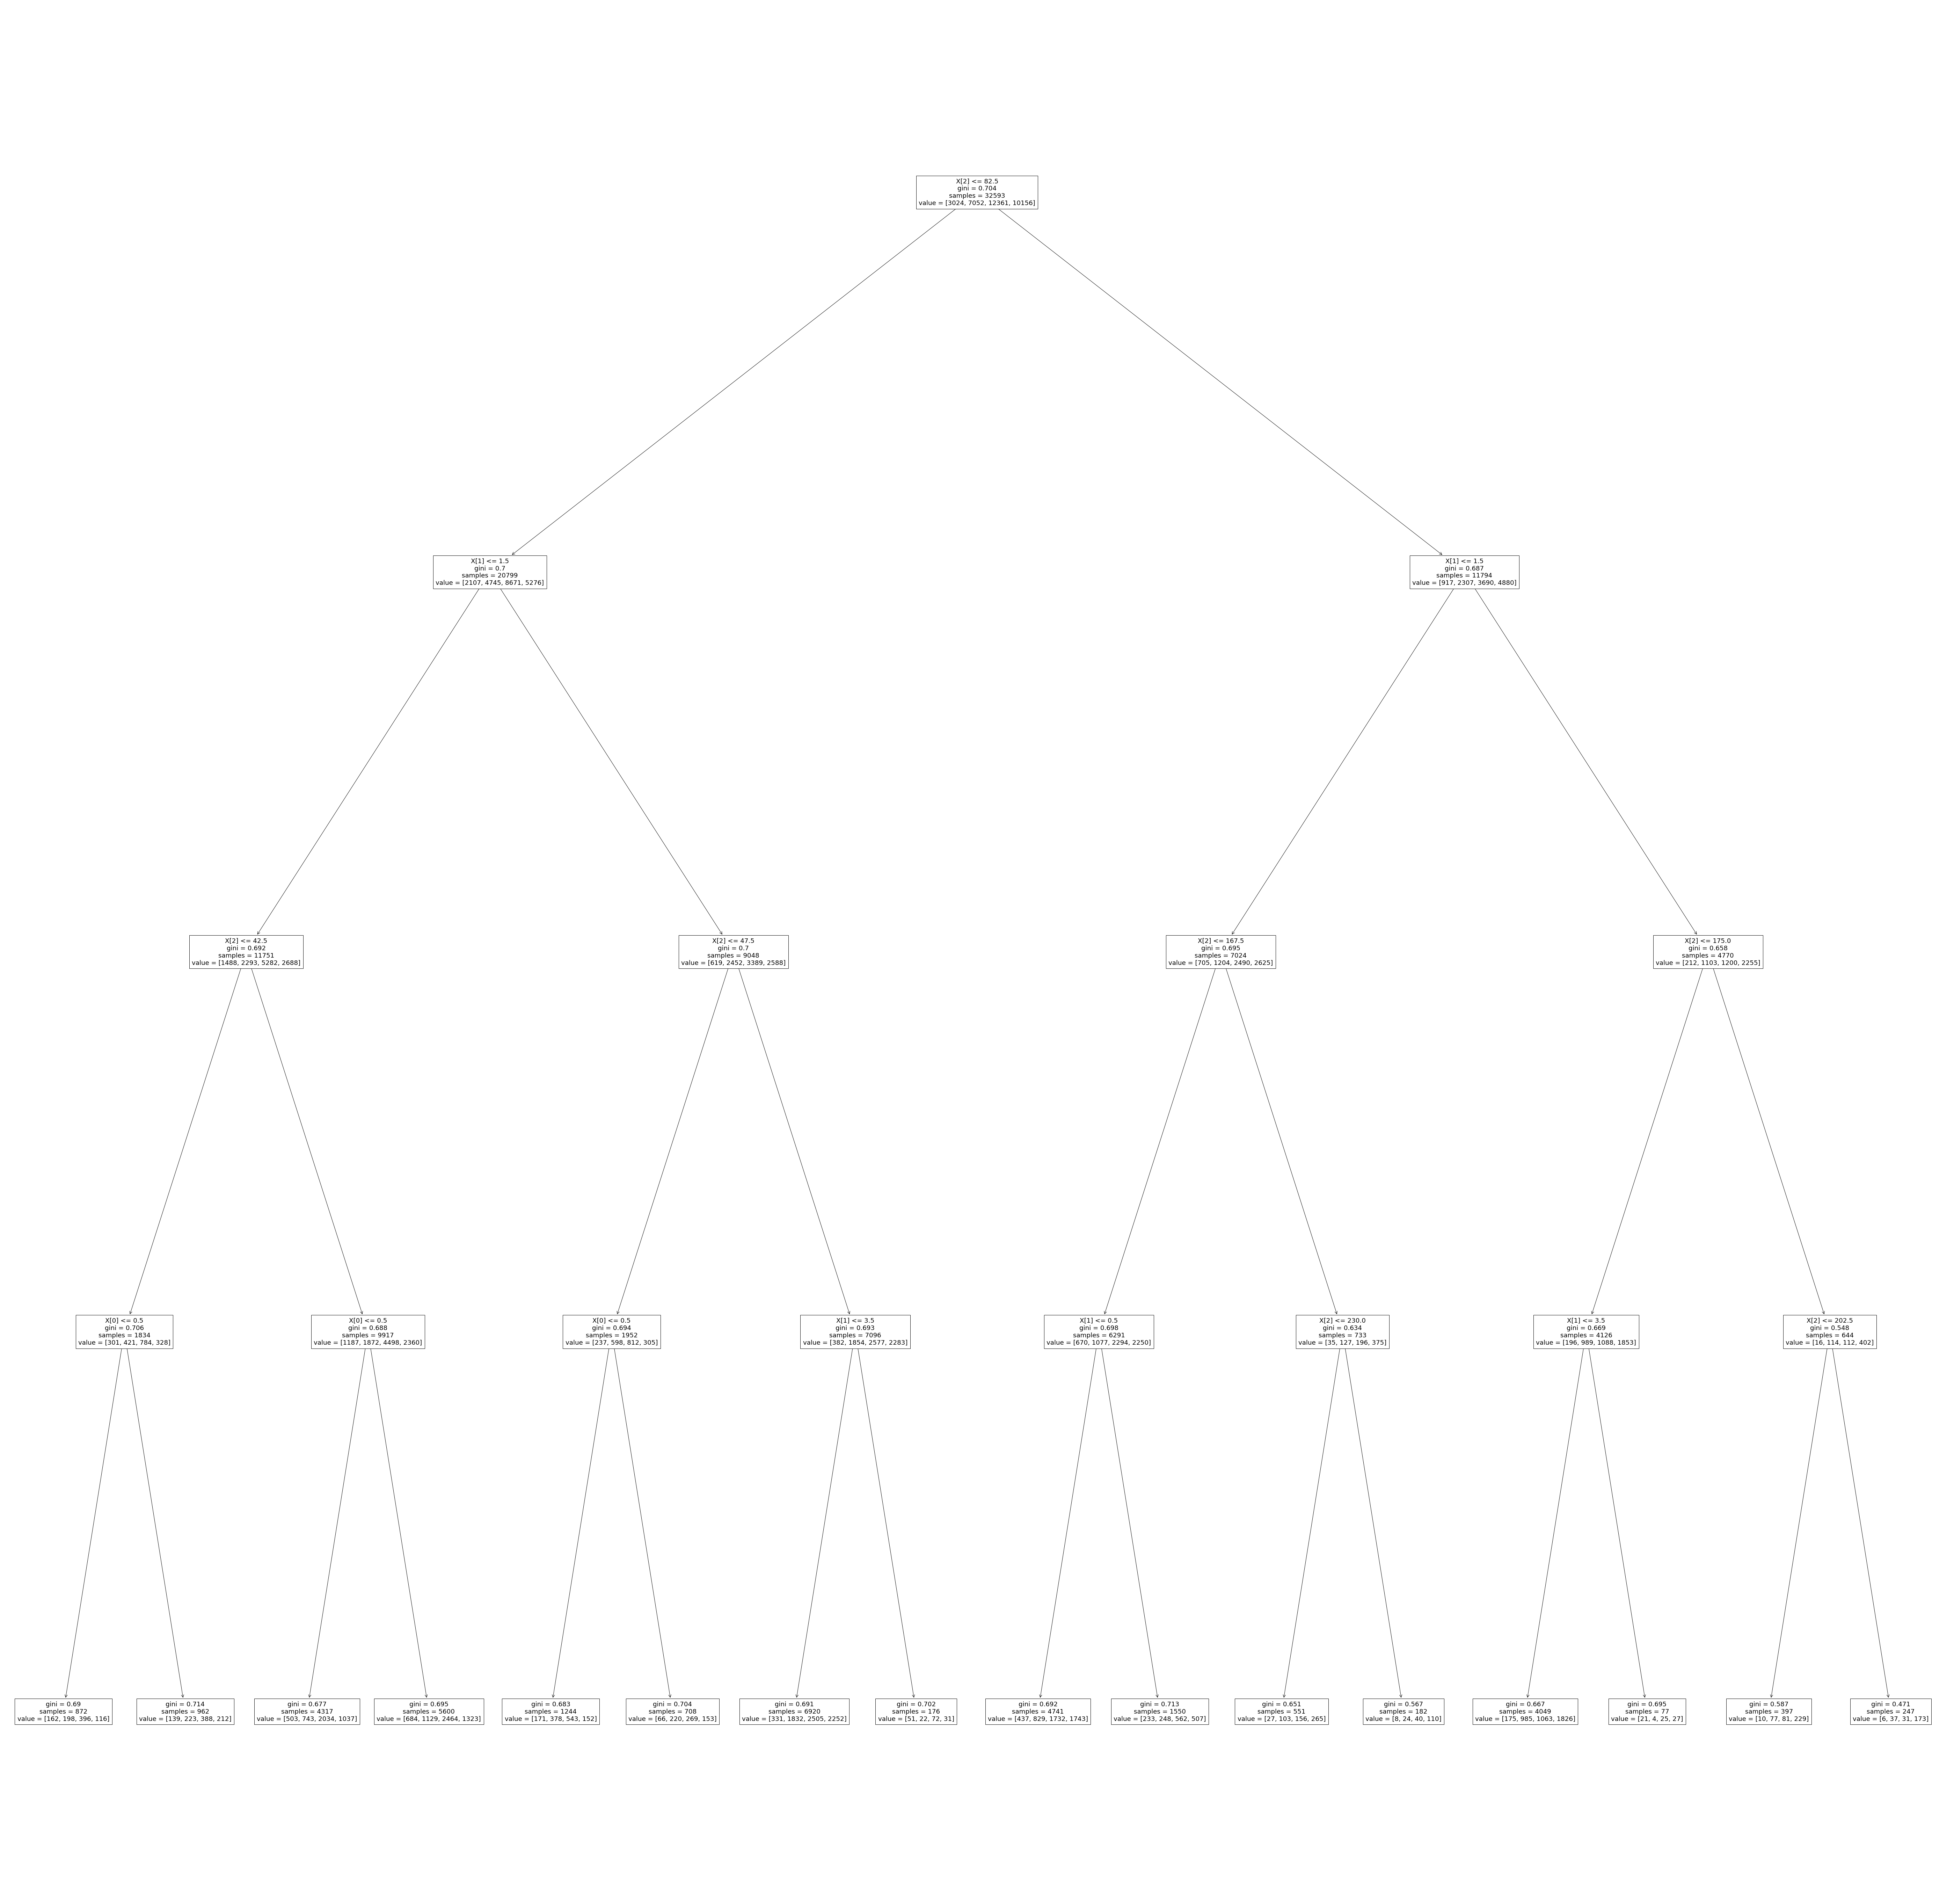

In [42]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100, 100))  # size of the output
plot_tree( classifier )
plt.show()

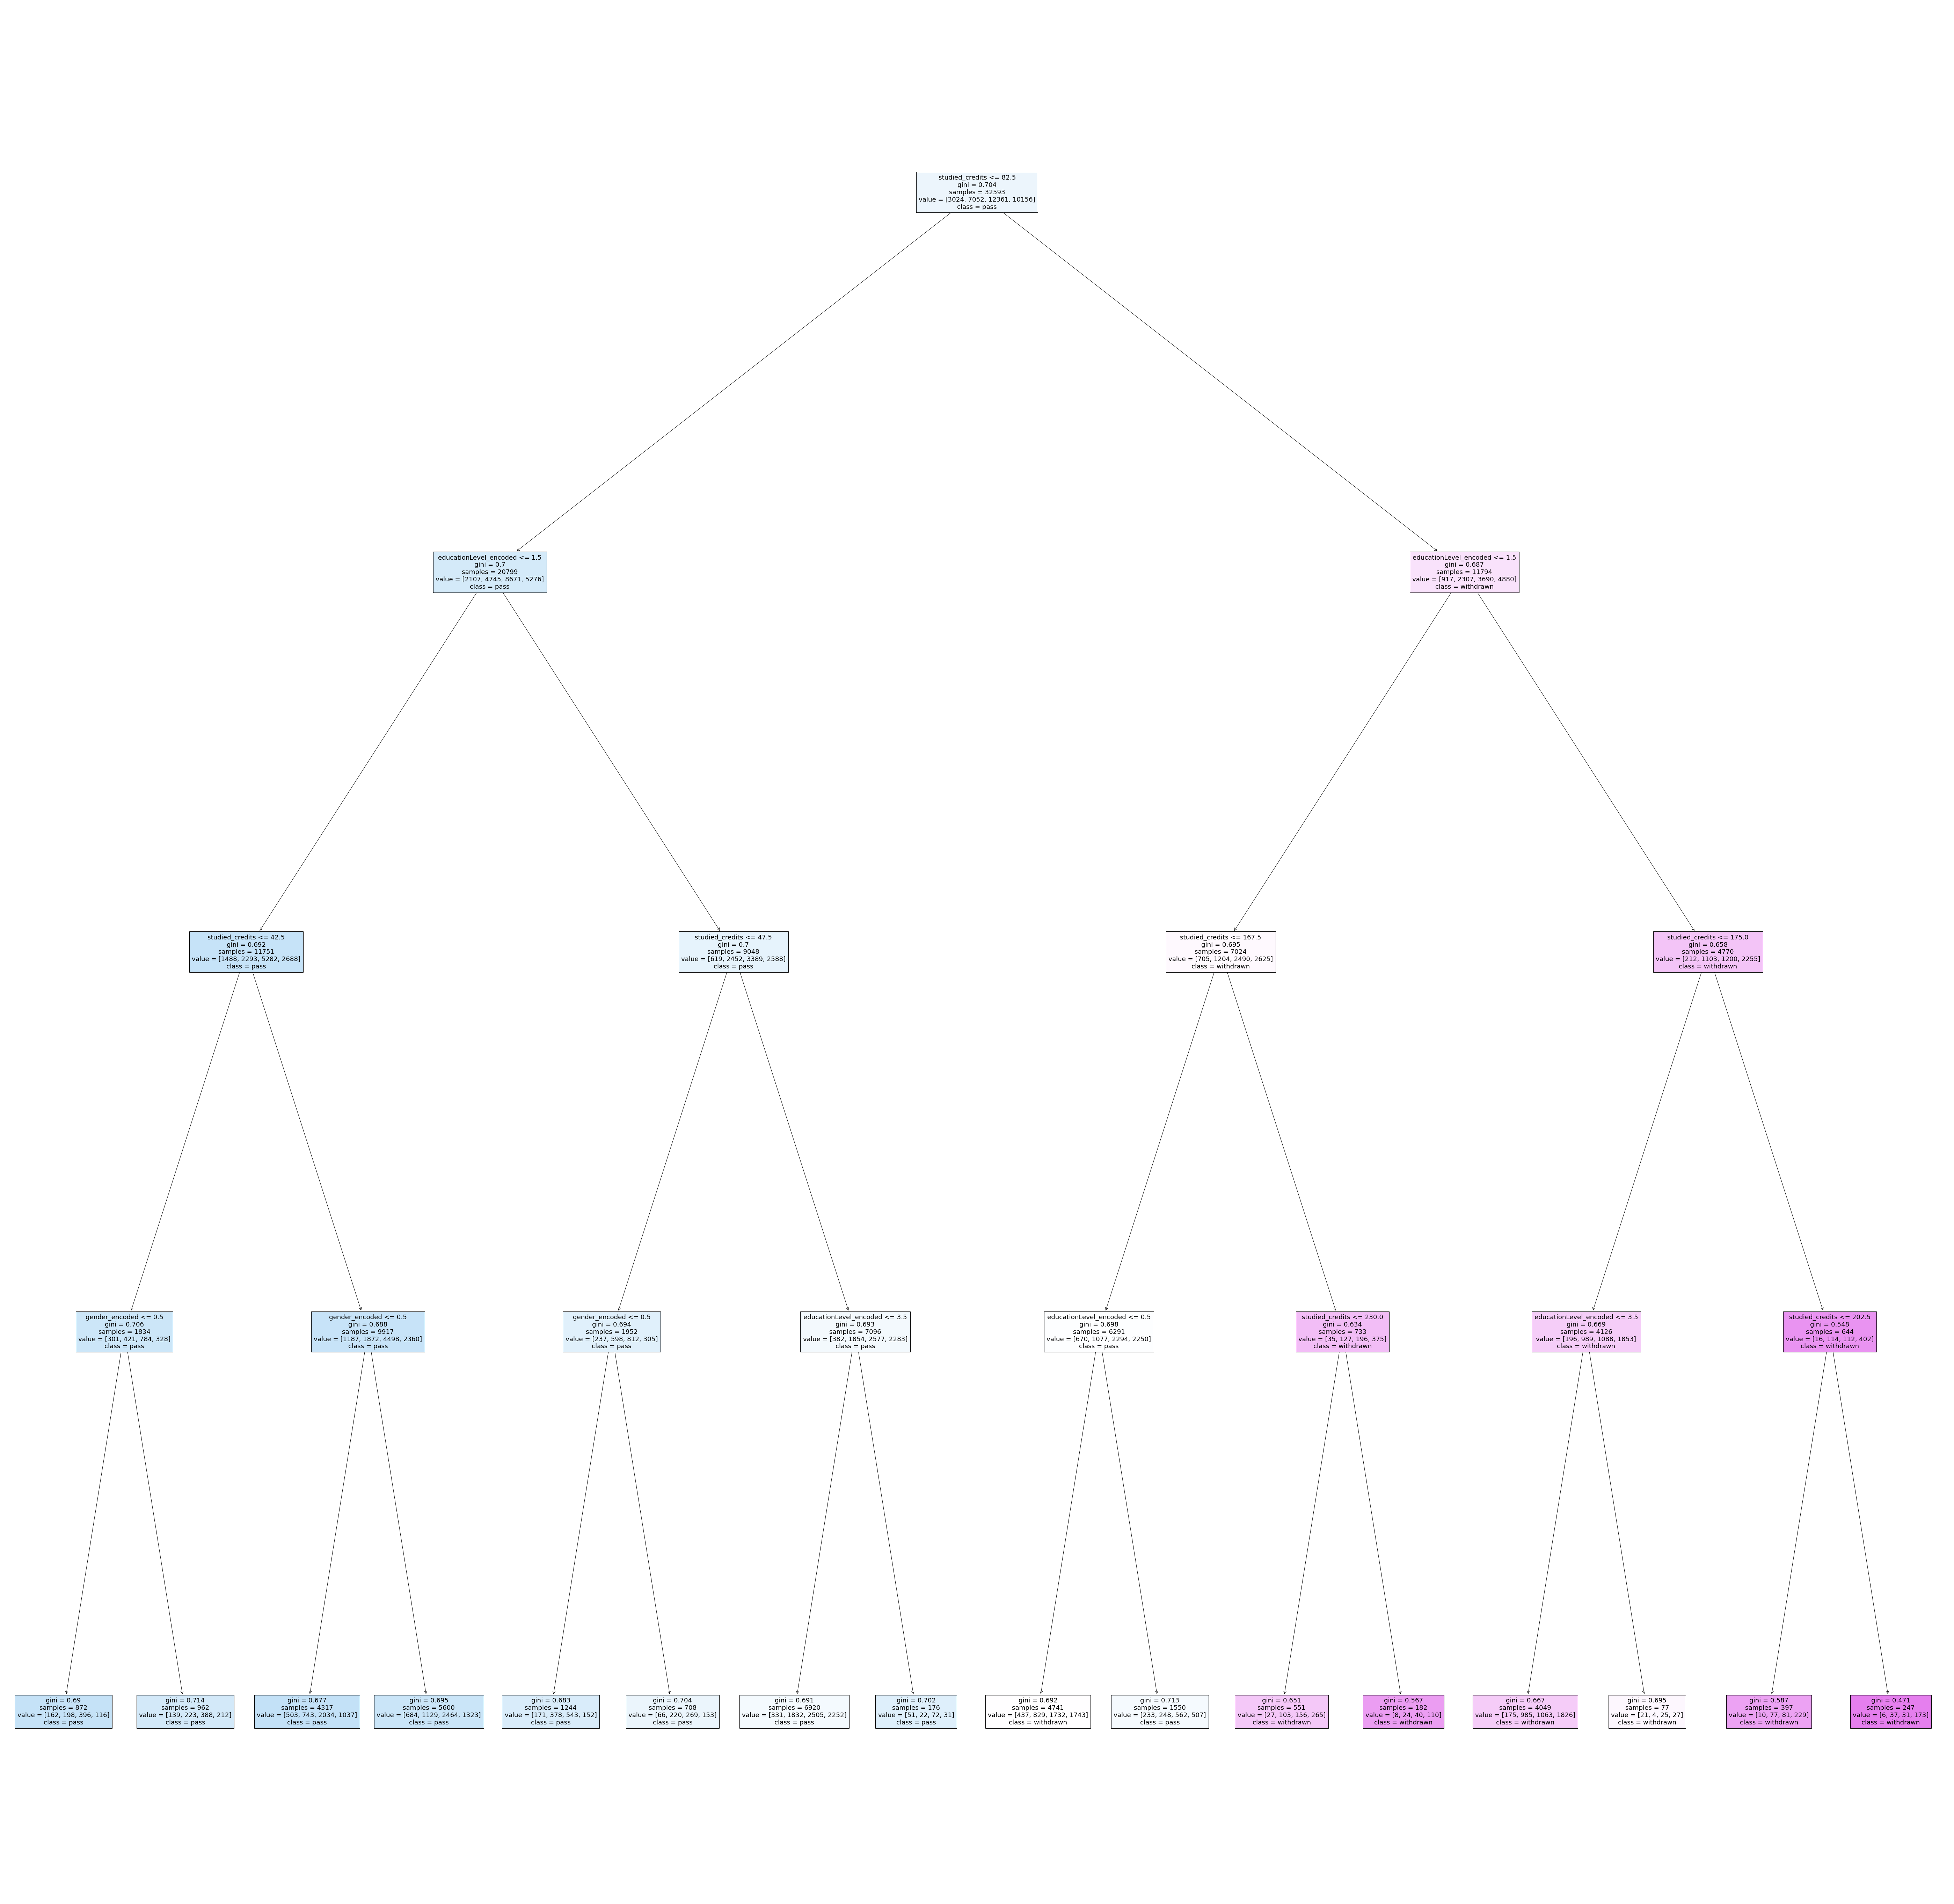

In [43]:
fig, ax = plt.subplots(figsize=(100, 100))  # whatever size you want
plot_tree( classifier, ax=ax, feature_names=df_input.columns,
                    class_names=['distinction', 'fail','pass','withdrawn'], filled=True )
plt.show()

In [44]:
cleanup_nums = {"highest_education" : { "Post Graduate Qualification":4,"HE Qualification":3, "A Level or Equivalent":2, "Lower Than A Level":1, "No Formal quals":0}}
df_copy = df.copy()

In [45]:
df_copy

code_module code_presentation  ...  result_encoded educationLevel_encoded
0             AAA             2013J  ...               2                      1
1             AAA             2013J  ...               2                      1
2             AAA             2013J  ...               3                      0
3             AAA             2013J  ...               2                      0
4             AAA             2013J  ...               2                      2
...           ...               ...  ...             ...                    ...
32588         GGG             2014J  ...               1                      2
32589         GGG             2014J  ...               0                      2
32590         GGG             2014J  ...               2                      0
32591         GGG             2014J  ...               3                      2
32592         GGG             2014J  ...               0                      1

[32593 rows x 15 columns]

In [46]:
df_copy.replace(cleanup_nums, inplace=True)

In [47]:
df_copy

code_module code_presentation  ...  result_encoded educationLevel_encoded
0             AAA             2013J  ...               2                      1
1             AAA             2013J  ...               2                      1
2             AAA             2013J  ...               3                      0
3             AAA             2013J  ...               2                      0
4             AAA             2013J  ...               2                      2
...           ...               ...  ...             ...                    ...
32588         GGG             2014J  ...               1                      2
32589         GGG             2014J  ...               0                      2
32590         GGG             2014J  ...               2                      0
32591         GGG             2014J  ...               3                      2
32592         GGG             2014J  ...               0                      1

[32593 rows x 15 columns]

In [48]:
df_input_copy = df_copy[["gender_encoded", "highest_education", "studied_credits"]]
df_input_copy

gender_encoded  highest_education  studied_credits
0                   1                  3              240
1                   0                  3               60
2                   0                  2               60
3                   0                  2               60
4                   0                  1               60
...               ...                ...              ...
32588               0                  1               30
32589               0                  1               30
32590               0                  2               30
32591               0                  1               30
32592               0                  3               30

[32593 rows x 3 columns]

In [49]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5)

In [50]:
classifier.fit(df_input_copy, df_copy["result_encoded"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

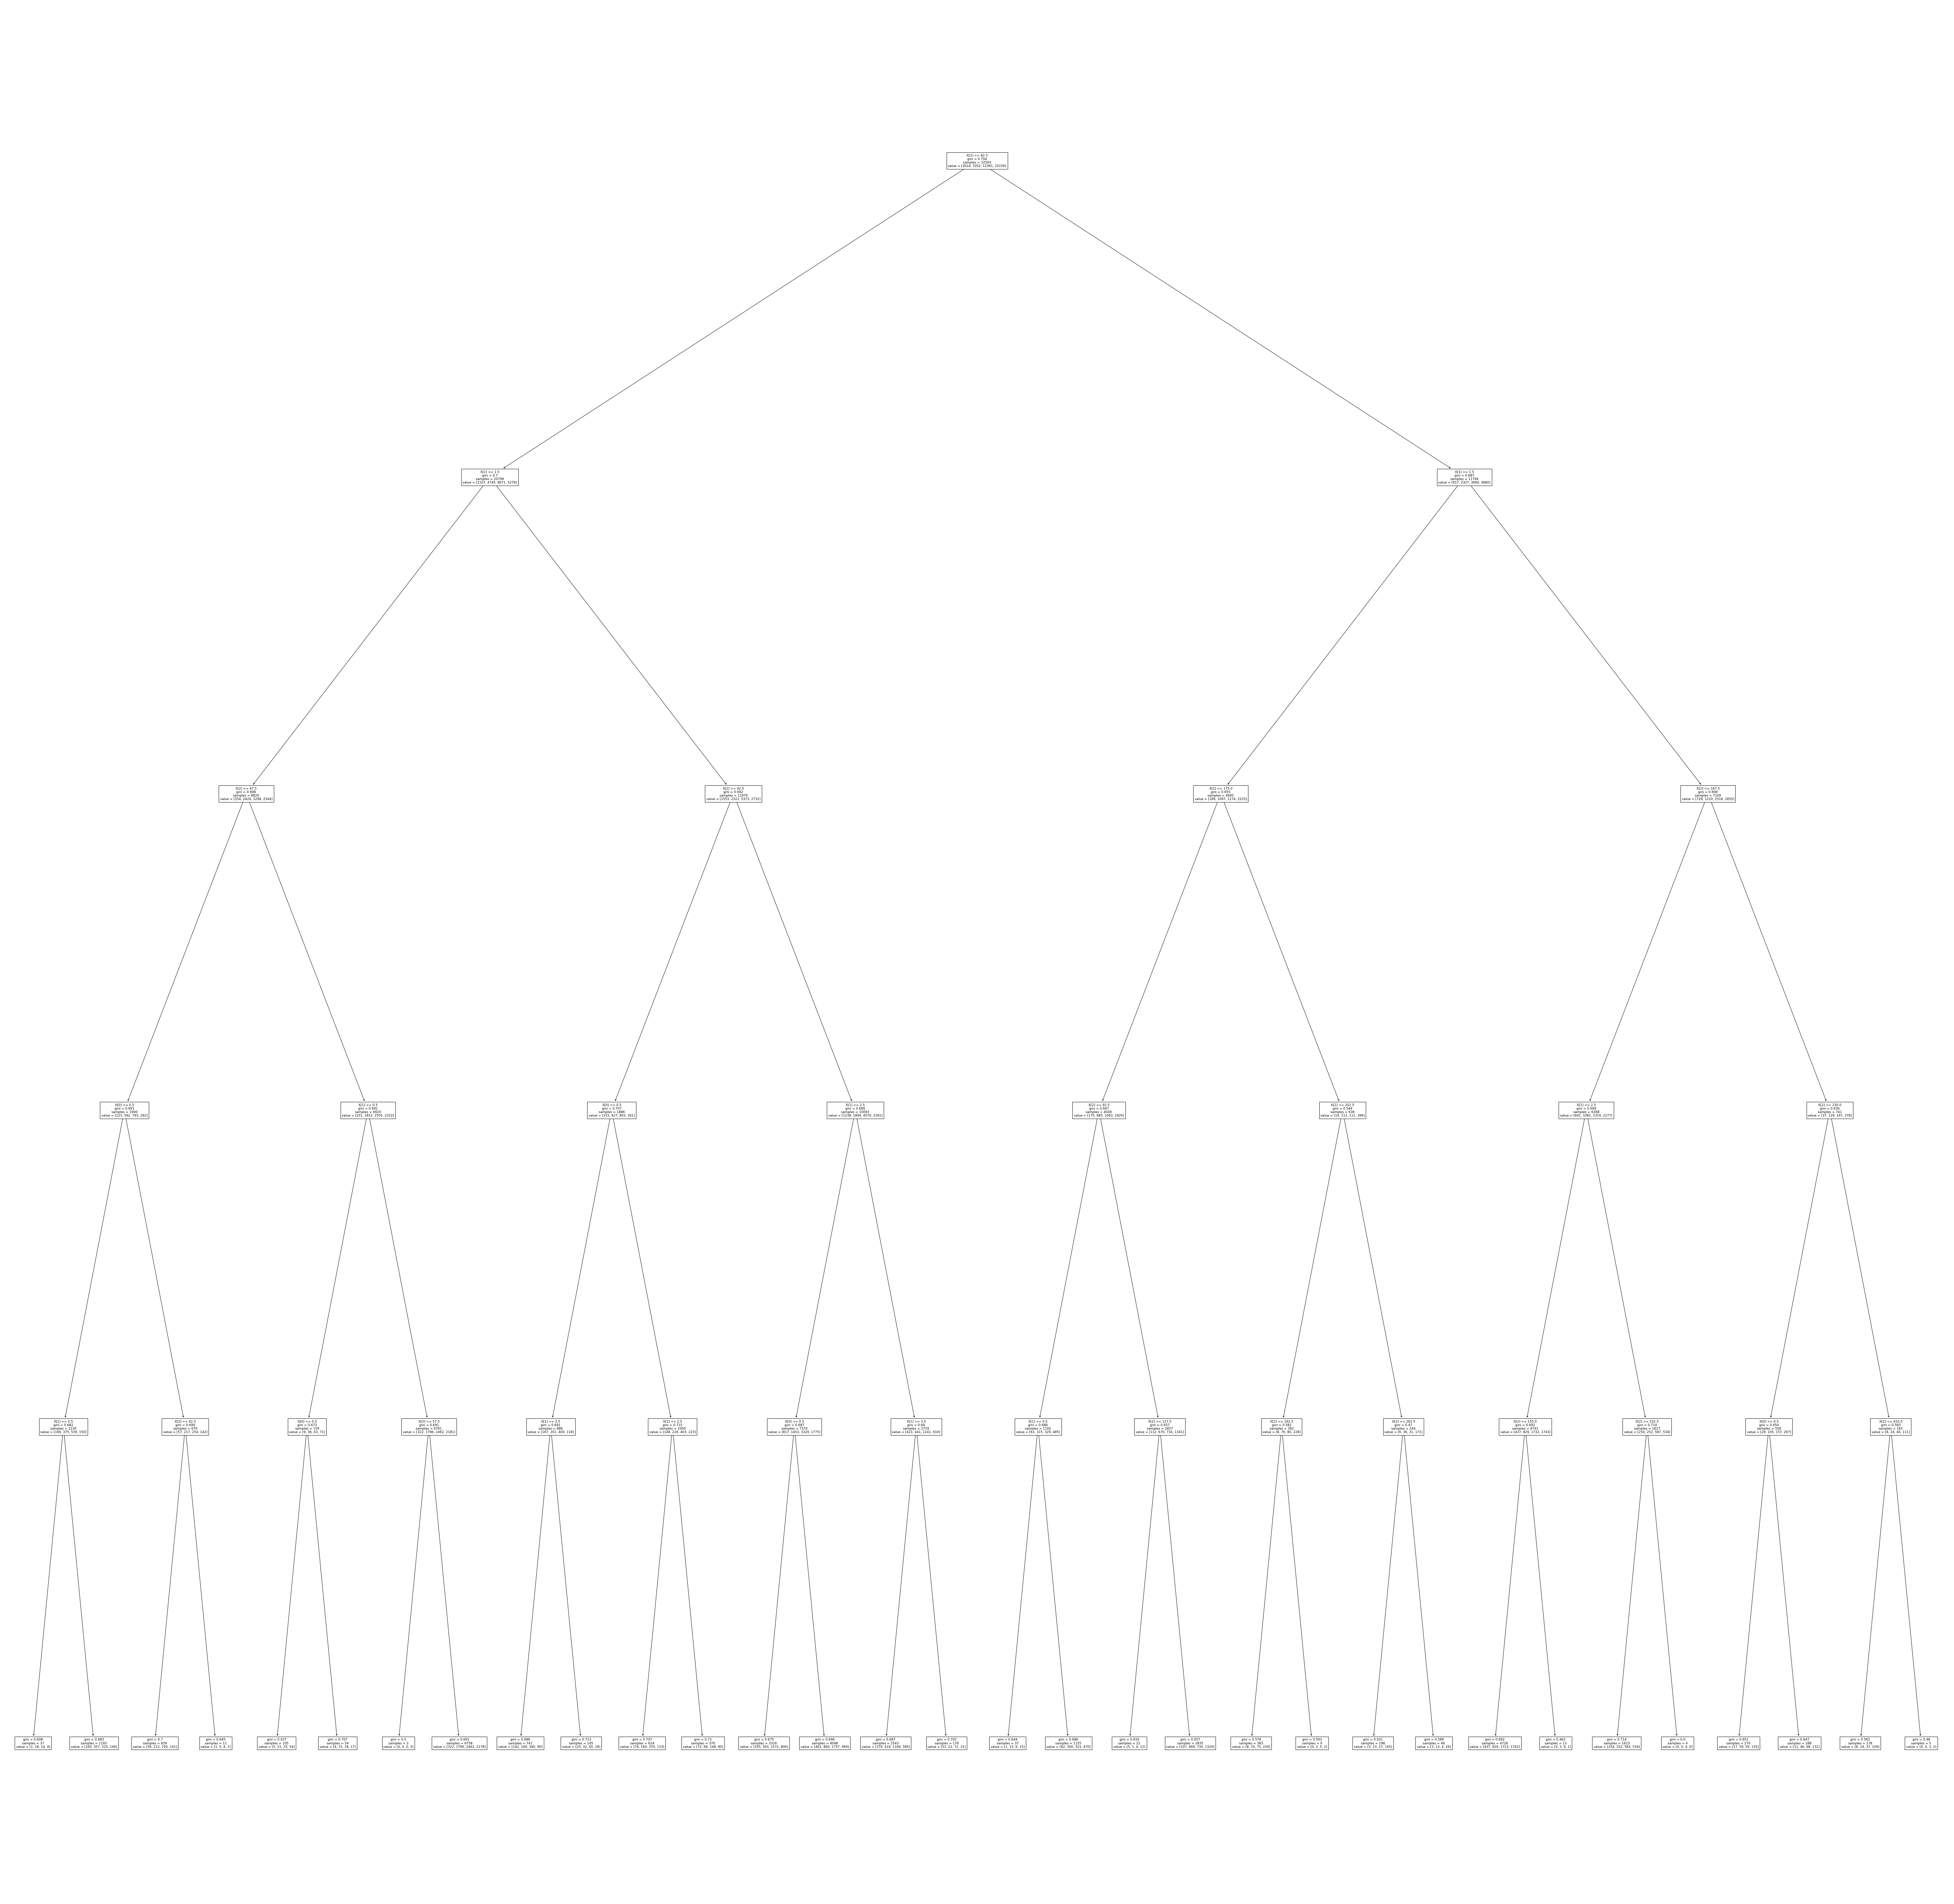

In [51]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100, 100))  # size of the output
plot_tree( classifier )
plt.show()

In [52]:
fig, ax = plt.subplots(figsize=(300, 300))  # whatever size you want
plot_tree( classifier, ax=ax, feature_names=df_input_copy.columns,
                    class_names=['distinction', 'fail','pass','withdrawn'], filled=True )
plt.show()